In [1]:
import os
import json
import glob
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from publib import set_style, fix_style


set_style(['article']) 

# Experiment Results Visualization

## 1. Plotting Setups

In [2]:
# Folder path containing the results
exp_name = 'May08'
baseline_results_folder = './results/' + exp_name
influence_results_dir = "./influence_results/" + exp_name

output_folder = './experiment_figs'
os.makedirs(output_folder, exist_ok=True)

# Define the datasets and models
datasets = ['paris', 'shanghai', 'la', 'london', 'cora']
models = ['mlp','cheb', 'gcn', 'sage', 'sgformer']
n_layers_list = [2, 4, 8, 16]

d_labels = {
    "paris":"Paris", "shanghai":"Shanghai", "la":"Los Angeles", "london":"London",
    "cora":"Cora","citeseer":"CiteSeer", "ogbn-arxiv":"ogbn-arxiv",
    "PascalVOC-SP":"PascalVOC-Transductive", "COCO-SP":"COCO-Transductive",
    "mlp":"MLP", "cheb":"ChebNet", "gcn":"GCN", "gat":"GAT", "sage":"GraphSAGE", "sgformer":"SGFormer",
}

d_color = {
    "sgformer":"#c5373e", # Red, "#9c251c", rgb(197, 55, 62)
    "gcn":   "#006eae", # Blue, "#00498d", rgb(0, 110, 174)
    "sage":  "#439130", # Green, "#1c6e2b", rgb(67, 145, 48)
    "cheb": "#e96a00", # Orange, "#b34900", rgb(233, 106, 0)
    "mlp":  "#734e3e", # "#734e3e", rgb(115, 78, 62)
}

## 2. Load Baseline Results

In [3]:
# Data structure to hold results
results = {
    dataset:{
        model: {}
        for model in models
    } 
    for dataset in datasets
}

# Function to parse the final test results from a file
def parse_results(file_path):
    results_ = {}  
    for name in glob.glob(f'{file_path}/*.json'):
        n_layers = int(name.split('nlayers-')[-1].split('_')[0])
        with open(name, 'r') as file:
            result_single = json.load(file)
        mean = result_single.get('mean_test_acc', None)
        std = result_single.get('std_test_acc', None)
        if mean:
            results_[n_layers] = [mean, std]
    return results_

# Read and store the results for each dataset and model
for dataset in datasets:
    for model in models:
        file_folder = baseline_results_folder + f"/{dataset}_{model}"
        if os.path.exists(file_folder):
            current_result = parse_results(file_folder)
            for n_layer, result in current_result.items():
                results[dataset][model][n_layer] = result
            r = deepcopy(results[dataset][model])
            results[dataset][model] = dict(sorted(r.items()))

for i in results:
    print(f"results for {i}")
    for j in results[i]:
        print(f"{j}: {results[i][j]}")

results for paris
mlp: {2: [23.24, 0.79], 4: [25.53, 0.48], 8: [24.42, 1.42], 16: [20.72, 1.3]}
cheb: {2: [22.11, 0.13], 4: [33.96, 0.11], 8: [48.32, 0.07], 16: [54.11, 0.17]}
gcn: {2: [24.35, 0.22], 4: [32.44, 0.21], 8: [44.76, 0.17], 16: [52.51, 0.26]}
sage: {2: [24.41, 0.26], 4: [32.6, 0.03], 8: [47.91, 0.31], 16: [53.38, 0.22]}
sgformer: {2: [27.35, 1.41], 4: [34.13, 1.2], 8: [43.93, 0.9], 16: [47.95, 0.77]}
results for shanghai
mlp: {2: [26.46, 0.11], 4: [28.39, 0.21], 8: [28.48, 0.6], 16: [25.53, 0.53]}
cheb: {2: [25.59, 0.22], 4: [34.7, 0.54], 8: [51.64, 0.27], 16: [66.17, 0.14]}
gcn: {2: [25.99, 0.19], 4: [31.9, 0.69], 8: [43.62, 0.7], 16: [60.41, 0.2]}
sage: {2: [25.72, 0.29], 4: [32.52, 0.65], 8: [48.36, 0.3], 16: [67.22, 0.52]}
sgformer: {2: [29.94, 0.86], 4: [36.45, 0.46], 8: [47.44, 0.56], 16: [58.12, 0.3]}
results for la
mlp: {2: [20.47, 0.31], 4: [24.14, 0.59], 8: [23.64, 0.23], 16: [20.49, 0.51]}
cheb: {2: [22.2, 0.19], 4: [32.73, 0.36], 8: [47.66, 0.54], 16: [59.31, 0.

## 3. Plot Baseline Results

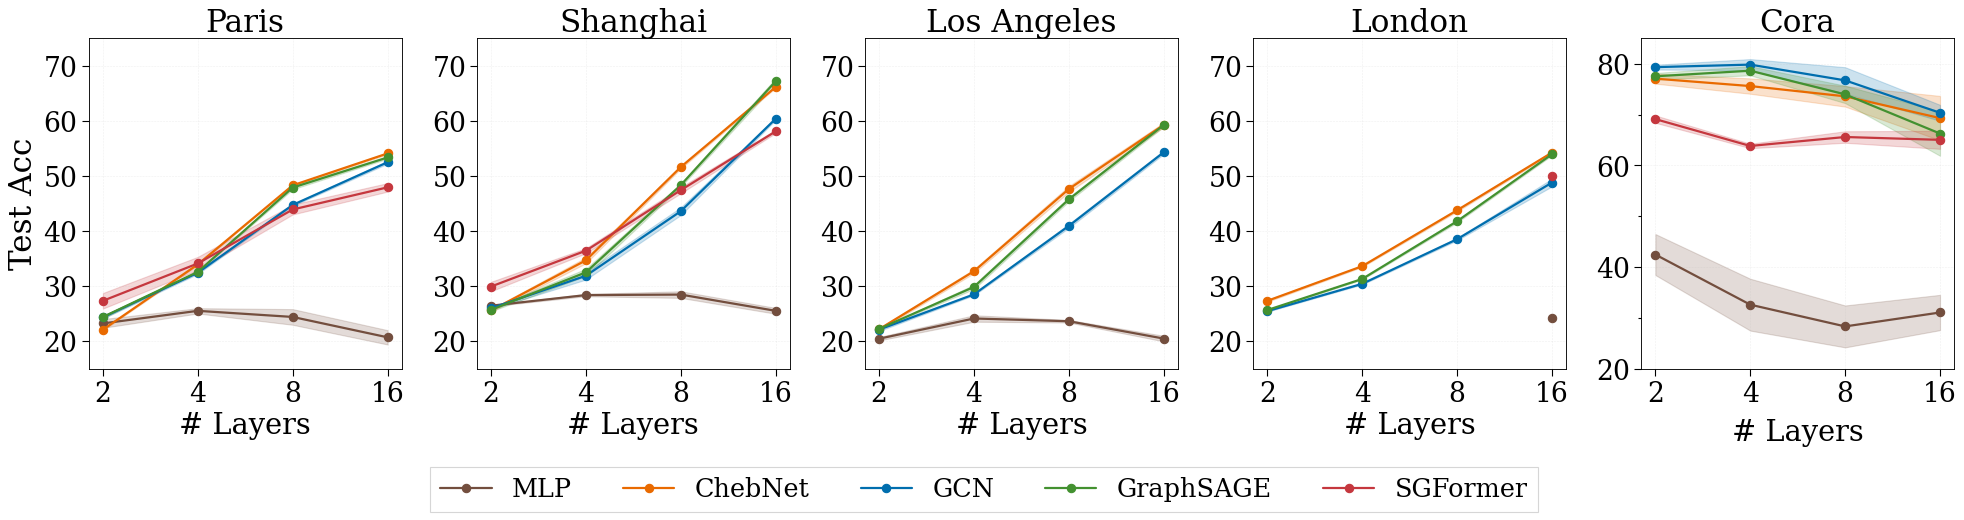

In [4]:
tick_size=24
fig, axes = plt.subplots(1, 5, figsize=(25, 6), sharey=False)

for idx, dataset in enumerate(datasets):
    ax = axes[idx]
    for model in models:
        n_layers_plot = results[dataset][model].keys()
        mean_std = results[dataset][model].values()
        means = [x[0] for x in mean_std]
        stds = [x[1] for x in mean_std]
        if means and stds:  # Ensure there are data to plot
            lower_bound = [
                m - s if m else None
                for m, s in zip(means, stds)
            ]
            upper_bound = [
                m + s if m else None
                for m, s in zip(means, stds)
            ]
            ax.plot(n_layers_plot, means, ".-", label=d_labels[model], color=d_color[model], markersize=15)  # Mean line
            ax.fill_between(n_layers_plot, lower_bound, upper_bound, color=d_color[model], alpha=0.2)  # Shaded area for std deviation
        if idx==4:
            handles, labels = axes[idx].get_legend_handles_labels()

    # Setting custom tick labels
    ax.set_xscale('log', base=2)
    ax.set_xticks(n_layers_list, )
    ax.tick_params(axis='both', labelsize=tick_size)
    ax.set_xticklabels([str(x) for x in n_layers_list])
    if idx < 4:
        ax.set_ylim(15, 75)
    else:
        ax.set_ylim(20, 85)
    ax.set_title(d_labels[dataset], fontsize=tick_size+4)
    ax.set_xlabel('# Layers', fontsize=tick_size+2)
    if idx == 0:
        ax.set_ylabel('Test Acc', fontsize=tick_size+4)

# Adding a global legend outside the plots
fig.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.5, 0.02), 
            frameon=True, fancybox=False, shadow=False, fontsize=tick_size-1, ncol=8, markerscale=1)

fix_style('article')
plt.savefig(f"{output_folder}/{exp_name}_baseline_results.jpg", bbox_inches='tight')
plt.show()

## 4. Load Influence Results

In [5]:
# Update the plot settings
datasets = ['paris', 'shanghai', 'la', 'london', 'cora', 'citeseer']
models = ['gcn', 'cheb', 'sage', 'sgformer']

d_color = {
    "paris":"#c5373e", # Red, "#9c251c", rgb(197, 55, 62)
    "shanghai":   "#006eae", # Blue, "#00498d", rgb(0, 110, 174)
    "la":  "#439130", # Green, "#1c6e2b",   rgb(67, 145, 48)
    "london": "#e96a00", # Orange, "#b34900",    rgb(233, 106, 0)
    "cora": "#a54891", # "#43536a",   rgb(110, 120, 142)
    "citeseer":  "#734e3e", # "#734e3e",    rgb(115, 78, 62)
    "PascalVOC-SP": "#202124", # black #792373,     rgb(165, 72, 145)
    "COCO-SP": "#6e788e", # Grey #6e788e
    "ogbn-arxiv": "#dca22c" # Yellow #dca22c
}

dot_type_dict = {
    "paris":"o-", "shanghai":"o-", "la":"o-", "london":"o-", 
    "cora":"s-", "citeseer":"s-", "ogbn-arxiv":"s-", 
    "PascalVOC-SP":"v-", "COCO-SP":"v-", 
}

# Load all results into a dictionary
results = {model: {} for model in models}

for dataset in datasets:
    for model in models:
        file_path = os.path.join(influence_results_dir, f"{dataset}_{model}_avg_tot_inf.npy")
        if os.path.exists(file_path):
            results[model][dataset] = {}
            results[model][dataset]['avg_tot_inf'] = np.load(file_path)
            file_path = os.path.join(influence_results_dir, f"{dataset}_{model}_R.npy")
            results[model][dataset]['R'] = np.load(file_path)

## 5. Plot Influence Results

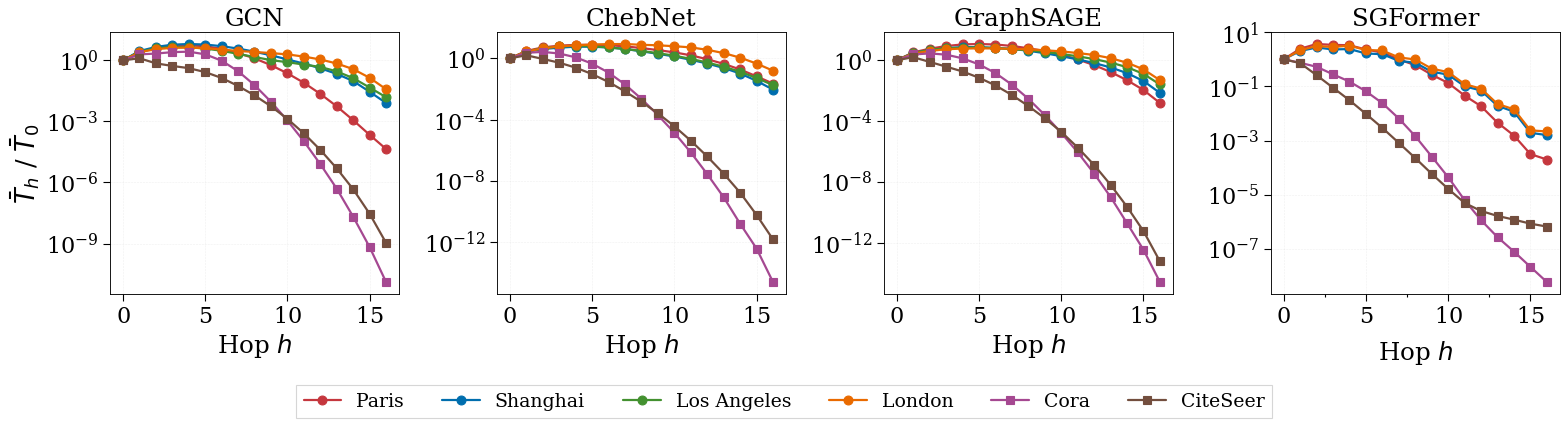

In [6]:
tick_size = 20
R_dict = {model: {} for model in models}

fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=False)

for i, model in enumerate(models):
    ax = axes[i]
    for dataset in datasets:
        if dataset in results[model]:
            norm_avg_tot_inf = results[model][dataset]['avg_tot_inf']
            dot_type = dot_type_dict[dataset]
            R = results[model][dataset]['R']
            R_dict[model][dataset] = R.round(3)
            x = np.arange(len(norm_avg_tot_inf))
            ax.plot(x, norm_avg_tot_inf, dot_type, 
                    label=d_labels[dataset], color=d_color[dataset], markersize=8)
        
    ax.set_title(d_labels[model], fontsize=tick_size+2)
    ax.tick_params(axis='both', labelsize=tick_size)
    ax.set_xlabel(r"Hop $h$", fontsize=tick_size+2)
    ax.set_yscale('log', base=10)
    if i == 0:
        ax.set_ylabel(r"$\bar{T}_h$ / $\bar{T}_0$", fontsize=tick_size+3)
        handles, labels = axes[i].get_legend_handles_labels()

# Add a legend from the last subplot
fig.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.5, 0.02), 
            frameon=True, fancybox=False, shadow=False, fontsize=tick_size-3, ncol=9, markerscale=1)

fix_style('article')
plt.savefig(f"{output_folder}/{exp_name}_influence.jpg", bbox_inches='tight')
plt.show()

In [7]:
# Results for influence-weighted receptive field R
for key, value in R_dict.items():
    print(key, value)

gcn {'paris': 4.314, 'shanghai': 5.329, 'la': 4.929, 'london': 5.112, 'cora': 3.345, 'citeseer': 2.432}
cheb {'paris': 5.188, 'shanghai': 7.682, 'la': 6.882, 'london': 7.381, 'cora': 2.354, 'citeseer': 1.75}
sage {'paris': 5.211, 'shanghai': 6.168, 'la': 6.071, 'london': 6.111, 'cora': 2.483, 'citeseer': 1.915}
sgformer {'paris': 3.538, 'shanghai': 3.713, 'london': 3.985, 'cora': 1.342, 'citeseer': 0.799}


## 6. Calculation of the Lower Bound in Section 5

Here we show the calculation of Equation (6) in Theorem 5.1: Bound on second largest positive eigenvalue of the normalized adjacency operator.

In [8]:
max_degree = {
    "paris":15,
    "shanghai":8,
    "la":9,
    "london":10,
    "pascal":10,
    "coco":10,
    "cora":168,
    "citeseer":99,
    "ogbn":13000,
}
diameter = {
    "paris":121,
    "shanghai":123,
    "la":171,
    "london":404,
    "pascal":28,
    "coco":27,
    "cora":19,
    "citeseer":28,
    "ogbn":25,
}

def get_lower_bound(max_degree, diameter):
    term1 = 2 * (max_degree - 1)**0.5 / max_degree
    term2 = 2 / diameter
    result = term1 - term2 * (1 + term1)
    return result

for key in max_degree.keys():
    ret = get_lower_bound(max_degree[key], diameter[key])
    print(f"{key}: {ret:.4f}")

paris: 0.4741
shanghai: 0.6344
la: 0.6095
london: 0.5921
pascal: 0.4857
coco: 0.4815
cora: 0.0324
citeseer: 0.1143
ogbn: -0.0639
